In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
data_set = pd.read_csv('Mall_Customers.csv')
data_set.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Genre                     200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [4]:
data_set.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [5]:
data_set['CustomerID'].unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [6]:
data_set['Genre'].unique()

array(['Male', 'Female'], dtype=object)

In [7]:
# Removing unwanted column 'CustomerID'
X = data_set.iloc[:, 1:].values

In [8]:
# Label encode categorical feature 'Genre'
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

Text(0.5, 1.0, 'Elbow Graph')

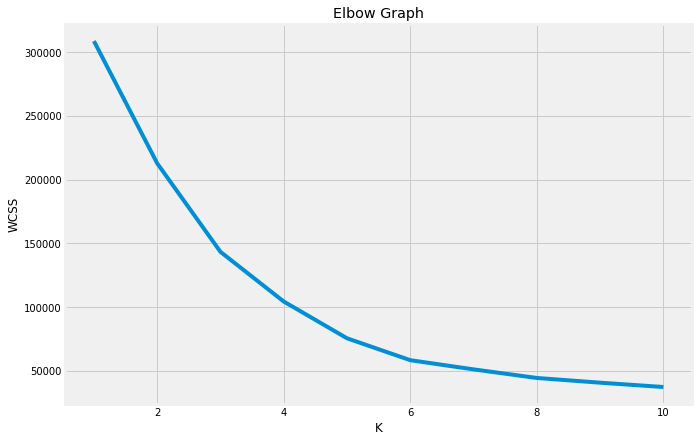

In [9]:
# Elbow graph to find optimal k value
from sklearn.cluster import KMeans

wcss = []  # list of wcss of kmeans model from k 1 to 10
K = []  # list of k (number of clusters) of kmeans model from k 1 to 10

for k in range(1, 11, 1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=2)
    kmeans.fit(X)
    
    K.append(k)
    wcss.append(kmeans.inertia_)
    
# Plotting the elbow graph
plt.figure(figsize=(10, 7))  # set figure size
plt.plot(K, wcss)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.title('Elbow Graph')

In [10]:
# From above albow graph we see that at k=5 there is very less abrupt change, therefore we select k=5 as our optimal number of clusters. 
k_means =  KMeans(n_clusters=5, init='k-means++', random_state=2)
k_means.fit(X)  # train model
clusters = k_means.predict(X)  # preict data (make clusters)
centroids = k_means.cluster_centers_  # cluster centroids

print('Clusters: ', clusters)
print()
print('Centroids: ', centroids)

Clusters:  [0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0
 3 0 3 0 3 0 3 0 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 4 4 3 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 2 1 4 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]

Centroids:  [[ 0.39130435 45.2173913  26.30434783 20.91304348]
 [ 0.46153846 32.69230769 86.53846154 82.12820513]
 [ 0.51351351 40.32432432 87.43243243 18.18918919]
 [ 0.44       24.96       28.04       77.        ]
 [ 0.40789474 43.93421053 55.21052632 49.44736842]]


In [11]:
# make data frames of each cluster

data_set_np = data_set.values  # numpy array of pandas data_set

# seperete each cluster into their individual list
cluster0 = list()
cluster1 = list()
cluster2 = list()
cluster3 = list()
cluster4 = list()

for customer, cluster in zip(data_set_np, clusters):
    if cluster == 0:
        cluster0.append(customer)
    elif cluster == 1:
        cluster1.append(customer)
    elif cluster == 2:
        cluster2.append(customer)
    elif cluster == 3:
        cluster3.append(customer)
    elif cluster == 4:
        cluster4.append(customer)

In [12]:
# dataframe for cluster 0
df_cluster0 = pd.DataFrame(data=cluster0, index=[i for i in range(0, len(cluster0))],
                           columns=['CustomerID', 'Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [13]:
df_cluster0.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,3,Female,20,16,6
2,5,Female,31,17,40
3,7,Female,35,18,6
4,9,Male,64,19,3


In [14]:
import collections

np_cluser0 = df_cluster0.values  # numpy version of dataframe 'df_cluster0' 

print('Analysis for cluster 0\n')

# Male
male_female_count = collections.Counter(df_cluster0['Genre'])
print('Males Count: ', male_female_count['Male'])
print('Females Count: ', male_female_count['Female'])

print()

male_ages = [age[2] for age in np_cluser0 if age[1] == 'Male']
print('Male ages range: ', male_ages)
print('Average male age: ', np.average(male_ages[1:]))   # average male age excluding outliar ie. 19
male_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Male']
print('Male ages with points: ', male_ages_points)
print('Average spending score Males: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Male']), 2))
print()

male_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Male']
print('Male annual income: ', male_annual_income)
print('Average male annual income: ', round(np.average(male_annual_income), 2))
male_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Male']
print('Male annual income with points: ', male_annual_income_points)


print()

# Female
female_ages = [age[2] for age in np_cluser0 if age[1] == 'Female']
print('Female ages range: ', female_ages)
print('Average female age: ', np.average(female_ages[1:]))   # average male age excluding outliar ie. 20
female_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Female']
print('Female ages with points: ', female_ages_points)
print('Average spending score Females: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Female']), 2))
print()

female_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Female']
print('Female annual income: ', female_annual_income)
print('Average Female annual income: ', round(np.average(female_annual_income), 2))
female_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Female']
print('Female annual income with points: ', female_annual_income_points)
print()

print('Total Count: ', len(np_cluser0))
print('Total average age: ', round(np.average(df_cluster0['Age'])))
print('Total average annual income: ', round(np.average(df_cluster0['Annual Income (k$)'])))
print(f"Total Range of annual income:  {min(df_cluster0['Annual Income (k$)'])}k - {max(df_cluster0['Annual Income (k$)'])}k")
print('Total average score: ', round(np.average(df_cluster0['Spending Score (1-100)']), 2))

Analysis for cluster 0

Males Count:  9
Females Count:  14

Male ages range:  [19, 64, 67, 37, 52, 35, 60, 53, 48]
Average male age:  52.0
Male ages with points:  [(19, 39), (64, 3), (67, 14), (37, 13), (52, 29), (35, 35), (60, 4), (53, 4), (48, 36)]
Average spending score Males:  19.67

Male annual income:  [15, 19, 19, 20, 23, 24, 30, 33, 39]
Average male annual income:  24.67
Male annual income with points:  [(15, 39), (19, 3), (19, 14), (20, 13), (23, 29), (24, 35), (30, 4), (33, 4), (39, 36)]

Female ages range:  [20, 31, 35, 58, 35, 46, 54, 45, 40, 49, 42, 36, 65, 49]
Average female age:  45.0
Female ages with points:  [(20, 6), (31, 40), (35, 6), (58, 15), (35, 35), (46, 5), (54, 14), (45, 32), (40, 31), (49, 14), (42, 17), (36, 26), (65, 35), (49, 28)]
Average spending score Females:  21.71

Female annual income:  [16, 17, 18, 20, 21, 25, 28, 28, 29, 33, 34, 37, 38, 39]
Average Female annual income:  27.36
Female annual income with points:  [(16, 6), (17, 40), (18, 6), (20, 15)

In [15]:
# Results for customer's in cluster 0
print('Interpreted Results:- This cluster has the low Spending score.\n')
print('Points to be noted: ')
print('1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.')
print('2. Customers have very low annual income, ie. approx. between 15k to 35k on average. (ignoring outliars)')
print('3. Customers in this cluster are very old, ie. 45yrs - 50yrs on average. (ignoring outliars)\n')
print('Conclusion: Customers that are old and having low annual income are very less likely to buy thing from mall oftenly.')

Interpreted Results:- This cluster has the low Spending score.

Points to be noted: 
1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.
2. Customers have very low annual income, ie. approx. between 15k to 35k on average. (ignoring outliars)
3. Customers in this cluster are very old, ie. 45yrs - 50yrs on average. (ignoring outliars)

Conclusion: Customers that are old and having low annual income are very less likely to buy thing from mall oftenly.


In [16]:
# dataframe for cluster 1
df_cluster1 = pd.DataFrame(data=cluster1, index=[i for i in range(0, len(cluster1))],
                           columns=['CustomerID', 'Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [17]:
df_cluster1.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,124,Male,39,69,91
1,126,Female,31,70,77
2,128,Male,40,71,95
3,130,Male,38,71,75
4,132,Male,39,71,75


In [18]:
np_cluser0 = df_cluster1.values  # numpy version of dataframe 'df_cluster1' 

print('Analysis for cluster 0\n')

# Male
male_female_count = collections.Counter(df_cluster1['Genre'])
print('Males Count: ', male_female_count['Male'])
print('Females Count: ', male_female_count['Female'])

print()

male_ages = [age[2] for age in np_cluser0 if age[1] == 'Male']
print('Male ages range: ', male_ages)
print('Average male age: ', round(np.average(male_ages[1:]), 1))   # average male age excluding outliar ie. 19
male_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Male']
print('Male ages with points: ', male_ages_points)
print('Average spending score Males: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Male']), 2))
print()

male_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Male']
print('Male annual income: ', male_annual_income)
print('Average male annual income: ', round(np.average(male_annual_income), 2))
male_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Male']
print('Male annual income with points: ', male_annual_income_points)


print()

# Female
female_ages = [age[2] for age in np_cluser0 if age[1] == 'Female']
print('Female ages range: ', female_ages)
print('Average female age: ', np.average(female_ages[1:]))   # average male age excluding outliar ie. 20
female_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Female']
print('Female ages with points: ', female_ages_points)
print('Average spending score Females: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Female']), 2))
print()

female_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Female']
print('Female annual income: ', female_annual_income)
print('Average Female annual income: ', round(np.average(female_annual_income), 2))
female_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Female']
print('Female annual income with points: ', female_annual_income_points)
print()

print('Total Count: ', len(np_cluser0))
print('Total average age: ', round(np.average(df_cluster1['Age'])))
print('Total average annual income: ', round(np.average(df_cluster1['Annual Income (k$)'])))
print(f"Range of annual income:  {min(df_cluster1['Annual Income (k$)'])}k - {max(df_cluster1['Annual Income (k$)'])}k")
print('Total average score: ', round(np.average(df_cluster1['Spending Score (1-100)']), 2))

Analysis for cluster 0

Males Count:  18
Females Count:  21

Male ages range:  [39, 40, 38, 39, 32, 32, 28, 34, 39, 32, 28, 36, 27, 35, 30, 28, 32, 30]
Average male age:  32.9
Male ages with points:  [(39, 91), (40, 95), (38, 75), (39, 75), (32, 73), (32, 93), (28, 97), (34, 90), (39, 88), (32, 63), (28, 75), (36, 92), (27, 69), (35, 90), (30, 97), (28, 68), (32, 74), (30, 83)]
Average spending score Males:  82.67

Male annual income:  [69, 71, 71, 71, 73, 75, 77, 78, 78, 87, 87, 87, 88, 93, 99, 101, 126, 137]
Average male annual income:  87.11
Male annual income with points:  [(69, 91), (71, 95), (71, 75), (71, 75), (73, 73), (75, 93), (77, 97), (78, 90), (78, 88), (87, 63), (87, 75), (87, 92), (88, 69), (93, 90), (99, 97), (101, 68), (126, 74), (137, 83)]

Female ages range:  [31, 31, 29, 35, 32, 32, 38, 27, 30, 30, 29, 31, 36, 33, 30, 32, 29, 36, 32, 38, 35]
Average female age:  32.25
Female ages with points:  [(31, 77), (31, 71), (29, 88), (35, 72), (32, 87), (32, 74), (38, 76), (2

In [19]:
# Results for customer's in cluster 1
print('Interpreted Results:- This cluster has the high Spending score.\n')
print('Points to be noted: ')
print('1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.')
print('2. Customers have very high annual income, ie. approx. between 80k to 125k on average. (ignoring outliars)')
print('3. Customers in this cluster are moderately young, ie. 30yrs - 40yrs on average. (ignoring outliars)\n')
print('Conclusion: Customers that are moderately young and having high annual income spends more.')

Interpreted Results:- This cluster has the high Spending score.

Points to be noted: 
1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.
2. Customers have very high annual income, ie. approx. between 80k to 125k on average. (ignoring outliars)
3. Customers in this cluster are moderately young, ie. 30yrs - 40yrs on average. (ignoring outliars)

Conclusion: Customers that are moderately young and having high annual income spends more.


In [20]:
# dataframe for cluster 2
df_cluster2 = pd.DataFrame(data=cluster2, index=[i for i in range(0, len(cluster2))],
                           columns=['CustomerID', 'Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [21]:
df_cluster2.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,125,Female,23,70,29
1,129,Male,59,71,11
2,131,Male,47,71,9
3,133,Female,25,72,34
4,135,Male,20,73,5


In [22]:
np_cluser0 = df_cluster2.values  # numpy version of dataframe 'df_cluster2' 

print('Analysis for cluster 0\n')

# Male
male_female_count = collections.Counter(df_cluster2['Genre'])
print('Males Count: ', male_female_count['Male'])
print('Females Count: ', male_female_count['Female'])

print()

male_ages = [age[2] for age in np_cluser0 if age[1] == 'Male']
print('Male ages range: ', male_ages)
print('Average male age: ', round(np.average(male_ages[1:]), 1))   # average male age excluding outliar ie. 19
male_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Male']
print('Male ages with points: ', male_ages_points)
print('Average spending score Males: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Male']), 2))
print()

male_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Male']
print('Male annual income: ', male_annual_income)
print('Average male annual income: ', round(np.average(male_annual_income), 2))
male_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Male']
print('Male annual income with points: ', male_annual_income_points)


print()

# Female
female_ages = [age[2] for age in np_cluser0 if age[1] == 'Female']
print('Female ages range: ', female_ages)
print('Average female age: ', round(np.average(female_ages[1:]), 1))   # average male age excluding outliar ie. 20
female_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Female']
print('Female ages with points: ', female_ages_points)
print('Average spending score Females: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Female']), 2))
print()

female_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Female']
print('Female annual income: ', female_annual_income)
print('Average Female annual income: ', round(np.average(female_annual_income), 2))
female_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Female']
print('Female annual income with points: ', female_annual_income_points)
print()

print('Total Count: ', len(np_cluser0))
print('Total average age: ', round(np.average(df_cluster2['Age'])))
print('Total average annual income: ', round(np.average(df_cluster2['Annual Income (k$)'])))
print(f"Range of annual income:  {min(df_cluster2['Annual Income (k$)'])}k - {max(df_cluster2['Annual Income (k$)'])}k")
print('Total average score: ', round(np.average(df_cluster2['Spending Score (1-100)']), 2))

Analysis for cluster 0

Males Count:  19
Females Count:  18

Male ages range:  [59, 47, 20, 19, 25, 48, 43, 37, 34, 19, 50, 42, 40, 36, 58, 59, 46, 33, 32]
Average male age:  38.2
Male ages with points:  [(59, 11), (47, 9), (20, 5), (19, 10), (25, 12), (48, 36), (43, 17), (37, 1), (34, 1), (19, 5), (50, 26), (42, 20), (40, 13), (36, 10), (58, 15), (59, 14), (46, 15), (33, 8), (32, 18)]
Average spending score Males:  12.95

Male annual income:  [71, 71, 73, 74, 77, 77, 78, 78, 78, 81, 85, 86, 87, 87, 88, 93, 98, 113, 137]
Average male annual income:  85.89
Male annual income with points:  [(71, 11), (71, 9), (73, 5), (74, 10), (77, 12), (77, 36), (78, 17), (78, 1), (78, 1), (81, 5), (85, 26), (86, 20), (87, 13), (87, 10), (88, 15), (93, 14), (98, 15), (113, 8), (137, 18)]

Female ages range:  [23, 25, 44, 57, 28, 34, 44, 47, 56, 36, 52, 37, 41, 54, 41, 34, 47, 45]
Average female age:  42.5
Female ages with points:  [(23, 29), (25, 34), (44, 7), (57, 5), (28, 40), (34, 22), (44, 20), (47

In [23]:
# Results for customer's in cluster 2
print('Interpreted Results:- This cluster has the low Spending score.\n')
print('Points to be noted: ')
print('1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.')
print('2. Customers have very high annual income, ie. approx. between 80k to 125k on average. (ignoring outliars)')
print('3. Customers in this cluster are moderately young, ie. 30yrs - 50yrs on average. (ignoring outliars)\n')
print('Conclusion: Customers that are moderately young to elder and having high annual income spends less.')

Interpreted Results:- This cluster has the low Spending score.

Points to be noted: 
1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.
2. Customers have very high annual income, ie. approx. between 80k to 125k on average. (ignoring outliars)
3. Customers in this cluster are moderately young, ie. 30yrs - 50yrs on average. (ignoring outliars)

Conclusion: Customers that are moderately young to elder and having high annual income spends less.


In [24]:
# dataframe for cluster 3
df_cluster3 = pd.DataFrame(data=cluster3, index=[i for i in range(0, len(cluster3))],
                           columns=['CustomerID', 'Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [25]:
df_cluster3.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,2,Male,21,15,81
1,4,Female,23,16,77
2,6,Female,22,17,76
3,8,Female,23,18,94
4,10,Female,30,19,72


In [26]:
np_cluser0 = df_cluster3.values  # numpy version of dataframe 'df_cluster3' 

print('Analysis for cluster 0\n')

# Male
male_female_count = collections.Counter(df_cluster3['Genre'])
print('Males Count: ', male_female_count['Male'])
print('Females Count: ', male_female_count['Female'])

print()

male_ages = [age[2] for age in np_cluser0 if age[1] == 'Male']
print('Male ages range: ', male_ages)
print('Average male age: ', round(np.average(male_ages[1:]), 1))   # average male age excluding outliar ie. 19
male_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Male']
print('Male ages with points: ', male_ages_points)
print('Average spending score Males: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Male']), 2))
print()

male_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Male']
print('Male annual income: ', male_annual_income)
print('Average male annual income: ', round(np.average(male_annual_income), 2))
male_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Male']
print('Male annual income with points: ', male_annual_income_points)


print()

# Female
female_ages = [age[2] for age in np_cluser0 if age[1] == 'Female']
print('Female ages range: ', female_ages)
print('Average female age: ', round(np.average(female_ages[1:]), 1))   # average male age excluding outliar ie. 20
female_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Female']
print('Female ages with points: ', female_ages_points)
print('Average spending score Females: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Female']), 2))
print()

female_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Female']
print('Female annual income: ', female_annual_income)
print('Average Female annual income: ', round(np.average(female_annual_income), 2))
female_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Female']
print('Female annual income with points: ', female_annual_income_points)
print()

print('Total Count: ', len(np_cluser0))
print('Total average age: ', round(np.average(df_cluster3['Age'])))
print('Total average annual income: ', round(np.average(df_cluster3['Annual Income (k$)'])))
print(f"Range of annual income:  {min(df_cluster3['Annual Income (k$)'])}k - {max(df_cluster3['Annual Income (k$)'])}k")
print('Total average score: ', round(np.average(df_cluster3['Spending Score (1-100)']), 2))

Analysis for cluster 0

Males Count:  11
Females Count:  14

Male ages range:  [21, 22, 20, 25, 31, 29, 35, 18, 24, 18, 19]
Average male age:  24.1
Male ages with points:  [(21, 81), (22, 79), (20, 66), (25, 73), (31, 73), (29, 82), (35, 61), (18, 92), (24, 92), (18, 59), (19, 59)]
Average spending score Males:  74.27

Male annual income:  [15, 20, 21, 24, 25, 28, 28, 33, 38, 48, 48]
Average male annual income:  29.82
Male annual income with points:  [(15, 81), (20, 79), (21, 66), (24, 73), (25, 73), (28, 82), (28, 61), (33, 92), (38, 92), (48, 59), (48, 59)]

Female ages range:  [23, 22, 23, 30, 35, 24, 35, 23, 21, 21, 30, 20, 31, 24]
Average female age:  26.1
Female ages with points:  [(23, 77), (22, 76), (23, 94), (30, 72), (35, 99), (24, 77), (35, 98), (23, 87), (21, 73), (21, 81), (30, 73), (20, 75), (31, 61), (24, 65)]
Average spending score Females:  79.14

Female annual income:  [16, 17, 18, 19, 19, 20, 23, 29, 30, 33, 34, 37, 39, 39]
Average Female annual income:  26.64
Female

In [27]:
# Results for customer's in cluster 3
print('Interpreted Results:- This cluster has the moderately high Spending score.\n')
print('Points to be noted: ')
print('1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.')
print('2. Customers have low annual income, ie. approx. between 20k to 40k on average. (ignoring outliars)')
print('3. Customers in this cluster are quite young, ie. 20yrs - 30yrs on average. (ignoring outliars)\n')
print('Conclusion: Customers that are quite young but having have low annual income spends more.')

Interpreted Results:- This cluster has the moderately high Spending score.

Points to be noted: 
1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.
2. Customers have low annual income, ie. approx. between 20k to 40k on average. (ignoring outliars)
3. Customers in this cluster are quite young, ie. 20yrs - 30yrs on average. (ignoring outliars)

Conclusion: Customers that are quite young but having have low annual income spends more.


In [28]:
# dataframe for cluster 4
df_cluster4 = pd.DataFrame(data=cluster4, index=[i for i in range(0, len(cluster4))],
                           columns=['CustomerID', 'Genre','Age', 'Annual Income (k$)', 'Spending Score (1-100)'])

In [29]:
df_cluster4.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,47,Female,50,40,55
1,48,Female,27,40,47
2,49,Female,29,40,42
3,50,Female,31,40,42
4,51,Female,49,42,52


In [30]:
np_cluser0 = df_cluster4.values  # numpy version of dataframe 'df_cluster4' 

print('Analysis for cluster 0\n')

# Male
male_female_count = collections.Counter(df_cluster4['Genre'])
print('Males Count: ', male_female_count['Male'])
print('Females Count: ', male_female_count['Female'])

print()

male_ages = [age[2] for age in np_cluser0 if age[1] == 'Male']
print('Male ages range: ', male_ages)
print('Average male age: ', round(np.average(male_ages[1:]), 1))   # average male age excluding outliar ie. 19
male_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Male']
print('Male ages with points: ', male_ages_points)
print('Average spending score Males: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Male']), 2))
print()

male_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Male']
print('Male annual income: ', male_annual_income)
print('Average male annual income: ', round(np.average(male_annual_income), 2))
male_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Male']
print('Male annual income with points: ', male_annual_income_points)


print()

# Female
female_ages = [age[2] for age in np_cluser0 if age[1] == 'Female']
print('Female ages range: ', female_ages)
print('Average female age: ', round(np.average(female_ages[1:]), 1))   # average male age excluding outliar ie. 20
female_ages_points = [(age[2], age[4]) for age in np_cluser0 if age[1] == 'Female']
print('Female ages with points: ', female_ages_points)
print('Average spending score Females: ', round(np.average([score[4] for score in np_cluser0 if score[1] == 'Female']), 2))
print()

female_annual_income = [income[3] for income in np_cluser0 if income[1] == 'Female']
print('Female annual income: ', female_annual_income)
print('Average Female annual income: ', round(np.average(female_annual_income), 2))
female_annual_income_points = [(income[3], income[4]) for income in np_cluser0 if income[1] == 'Female']
print('Female annual income with points: ', female_annual_income_points)
print()

print('Total Count: ', len(np_cluser0))
print('Total average age: ', round(np.average(df_cluster4['Age'])))
print('Total average annual income: ', round(np.average(df_cluster4['Annual Income (k$)'])))
print(f"Range of annual income:  {min(df_cluster4['Annual Income (k$)'])}k - {max(df_cluster4['Annual Income (k$)'])}k")
print('Total average score: ', round(np.average(df_cluster4['Spending Score (1-100)']), 2))

Analysis for cluster 0

Males Count:  31
Females Count:  45

Male ages range:  [33, 59, 47, 69, 53, 70, 19, 63, 70, 59, 26, 40, 57, 38, 67, 48, 18, 48, 24, 48, 20, 67, 26, 49, 54, 68, 66, 65, 19, 27, 43]
Average male age:  47.6
Male ages with points:  [(33, 60), (59, 60), (47, 41), (69, 46), (53, 46), (70, 56), (19, 55), (63, 51), (70, 55), (59, 47), (26, 54), (40, 48), (57, 51), (38, 55), (67, 41), (48, 46), (18, 41), (48, 49), (24, 52), (48, 42), (20, 49), (67, 59), (26, 55), (49, 56), (54, 46), (68, 43), (66, 48), (65, 52), (19, 46), (27, 56), (43, 35)]
Average spending score Males:  49.71

Male annual income:  [42, 43, 43, 44, 46, 46, 46, 48, 49, 54, 54, 54, 54, 54, 54, 54, 59, 60, 60, 61, 61, 62, 62, 62, 63, 63, 63, 63, 64, 67, 71]
Average male annual income:  55.68
Male annual income with points:  [(42, 60), (43, 60), (43, 41), (44, 46), (46, 46), (46, 56), (46, 55), (48, 51), (49, 55), (54, 47), (54, 54), (54, 48), (54, 51), (54, 55), (54, 41), (54, 46), (59, 41), (60, 49), (60,

In [31]:
# Results for customer's in cluster 4
print('Interpreted Results:- This cluster has the moderate Spending score.\n')
print('Points to be noted: ')
print('1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.')
print('2. Customers have moderate annual income, ie. approx. between 40k to 55k on average. (ignoring outliars)')
print('3. Customers in this cluster are moderately young, ie. 20yrs - 30yrs on average. (ignoring outliars)\n')
print('Conclusion: Customers that are moderately young and having moderate annual income spends moderately.')

Interpreted Results:- This cluster has the moderate Spending score.

Points to be noted: 
1. Both Males and Females customers are scoring approximately same score on average, having ages and annual income approx. same on average.
2. Customers have moderate annual income, ie. approx. between 40k to 55k on average. (ignoring outliars)
3. Customers in this cluster are moderately young, ie. 20yrs - 30yrs on average. (ignoring outliars)

Conclusion: Customers that are moderately young and having moderate annual income spends moderately.


# Final Report

All of our customers are divided into 5 types/classes/clusters, therfore we have 5 interpretations/conclusions...

1. Customers that are old and having low annual income are very less likely to buy thing from mall oftenly.
2. Customers that are moderately young and having high annual income spends more.
3. Customers that are moderately young to old and having high annual income spends less.
4. Customers that are quite young but having have low annual income spends more.
5. Customers that are moderately young and having moderate annual income spends moderately.

Note:- More precise details of above conclusions/interpretations are shown above.

In [32]:
# save model
import pickle  
with open('Model.txt','wb') as f:
    pickle.dump(k_means, f)